# K-Means Clustering

In [1]:
# imported all the modules needed

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# importing data set
# check null variables, and dtype

df = pd.read_csv("abalone.csv")
df.describe().T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [3]:
# just check the table
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# gender values have been translated numerically with LabelEncoder()

encoder = LabelEncoder()

df["Sex"] = encoder.fit_transform(df["Sex"])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


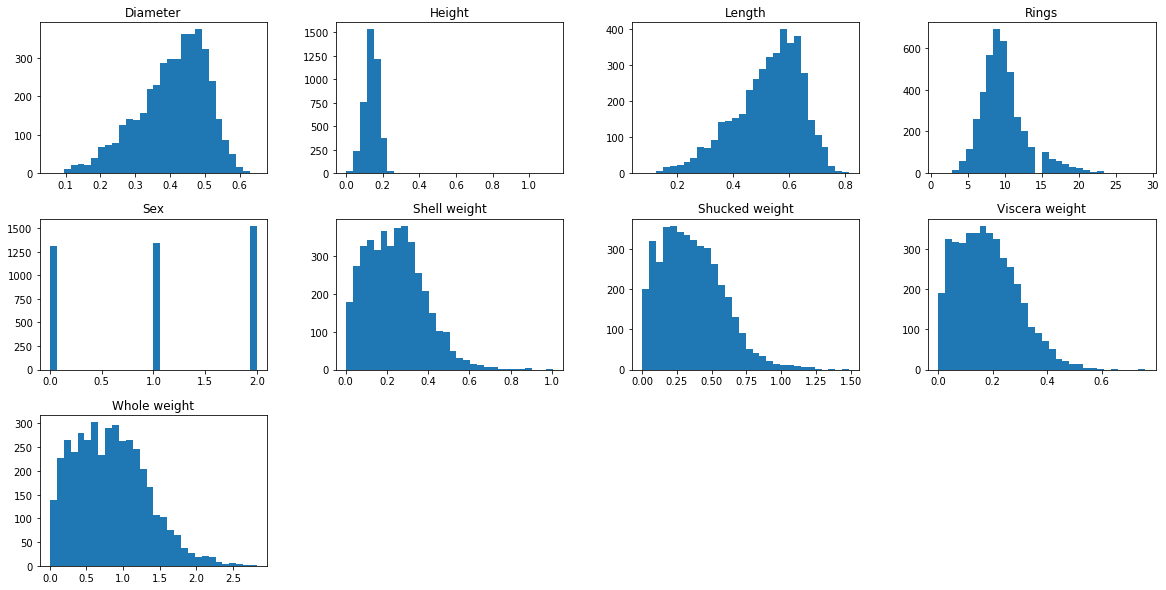

In [5]:
df.hist(figsize=(20,10), grid=False, layout=(3, 4), bins = 30)
plt.show()

In [6]:
# describe data and check some statistical attributes.
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
# First, scaling transformation is required. Because most of the column values 
#are usually distributed between 0 and 2, but the Rings column values are outside this range. 
#Therefore, the properties were scaled using MinMaxScaler ().

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns = df.columns)
df_scaled

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,1.0,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.0,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,1.0,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.5,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4173,1.0,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4174,1.0,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4175,0.0,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


In [8]:
# Clustering with K-means algorithm.
# k-means++ is used!

kList = np.arange(2,11)

distortionList =[]
silhouetteList = []

for k in kList:
    kmeans = KMeans(n_clusters = k, n_init=100, init='k-means++')
    kmeans.fit(df_scaled)
    distortionList.append(kmeans.inertia_)
    silhouetteList.append(silhouette_score(df_scaled , kmeans.labels_))

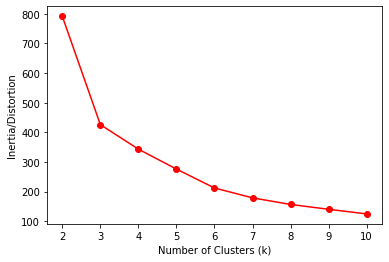

In [9]:
# Elbow Method for finding best k.

plt.plot(kList , distortionList, marker="o", color="r")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia/Distortion")
plt.show()

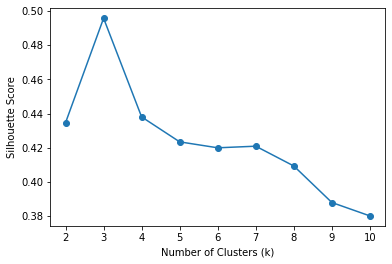

In [10]:
# Silhouette Scores for finding best k.

plt.plot(kList , silhouetteList, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [11]:
# model fitted again with k=3.

kmeans = KMeans(n_clusters = 3, n_init = 100)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
# Interpretation of Final Clusters

kmeans.cluster_centers_
results = pd.DataFrame(kmeans.cluster_centers_ , columns = df.columns)
results

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.549245,0.450689,0.430635,0.091413,0.130041,0.108905,0.103235,0.108849,0.240737
1,1.000000,0.697518,0.687153,0.141546,0.389847,0.323937,0.314860,0.309717,0.360191
2,0.028947,0.695087,0.685443,0.142172,0.382593,0.309702,0.313049,0.309797,0.367803
